# Skalowanie i standaryzacja zmiennych

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import statistics

Załadujmy zbiór danych boston i na nim przeprowadzajmy transormacje zmiennych.
https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [38]:
data = load_boston()
X = data["data"]
X = pd.DataFrame(X)
X.columns = data["feature_names"]
y = data["target"]

In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Skalowanie zmiennch

Chcemy napisać funkcję przyjmującą jedną kolumnę z ramki danych i przekształcającą ją liniowo w zakres 0-1.

In [40]:
def scale_0_1(array):
    val_max = max(array)
    val_min = min(array)
    return (array - val_min)/(val_max - val_min)

In [41]:
new_first_column = scale_0_1(X.iloc[:, 0])
new_first_column.head()

0    0.000000
1    0.000236
2    0.000236
3    0.000293
4    0.000705
Name: CRIM, dtype: float64

In [42]:
new_first_column.describe()

count    506.000000
mean       0.040544
std        0.096679
min        0.000000
25%        0.000851
50%        0.002812
75%        0.041258
max        1.000000
Name: CRIM, dtype: float64

## Standaryzacja zmiennych

Chcemy napisać funkcję przyjmującą jedna kolumnę z rami danych i przekształcającą ją tak aby miała średnią 0 i odchylenie standardowe wynoszące 1.

In [43]:
def standarize(array):
    mean = statistics.mean(array)
    std = statistics.stdev(array)
    return (array - mean)/std

In [44]:
new_first_column = standarize(X.iloc[:,0])
new_first_column.head()

0   -0.419367
1   -0.416927
2   -0.416929
3   -0.416338
4   -0.412074
Name: CRIM, dtype: float64

In [45]:
new_first_column.describe()

count    5.060000e+02
mean     2.426693e-16
std      1.000000e+00
min     -4.193669e-01
25%     -4.105633e-01
50%     -3.902803e-01
75%      7.389247e-03
max      9.924110e+00
Name: CRIM, dtype: float64

### Zadanie 1

Napisać kod (funkcję), która przyjmuje ramkę danych i standaryzuje ją używając funkcji przygotowanych powyżej.

In [46]:
def standarize_data_frame(df):
    for i in range(df.shape[1]):
        df.iloc[:,i] = standarize(df.iloc[:,i])
    return df

In [47]:
standarize_data_frame(X).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,2.426693e-16,-2.248970e-16,-3.444215e-16,-3.940634e-16,-2.405849e-16,-5.715674e-17,-3.181469e-17,-5.616939e-17,1.664018e-15,3.918692e-16,-1.008416e-15,1.857320e-16,-1.178241e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


### Zadanie 2

Napisać kod (funkcję), która przyjmuje ramkę danych i skaluje ją używając funkcji przygotowanej powyżej.

In [48]:
def scale_data_frame(df):
    for i in range(df.shape[1]):
        df.iloc[:,i] = scale_0_1(df.iloc[:,i])
    return df

In [49]:
scale_data_frame(X).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Zadanie 3
Utwórz obok siebie dwa histogramy - danych oryginalnych i po skalowaniu dla kolumny 'AGE'

In [34]:
data = load_boston()
X = data["data"]
X = pd.DataFrame(X)
X.columns = data["feature_names"]
y = data["target"]

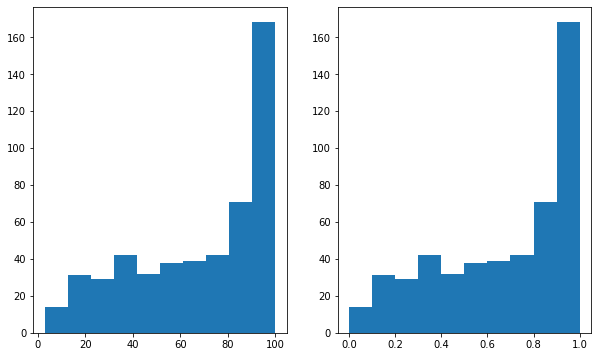

In [35]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2,figsize=(10,6))
axs[0]=plt.subplot(1, 2, 1)
axs[0].hist(X['AGE'])
axs[1]=plt.subplot(1, 2, 2)
axs[1].hist(scale_0_1(X['AGE']))
plt.show()

## Zadanie 4
Utwórz obok siebie dwa histogramy - danych oryginalnych i po standaryzacji dla kolumny 'RM'

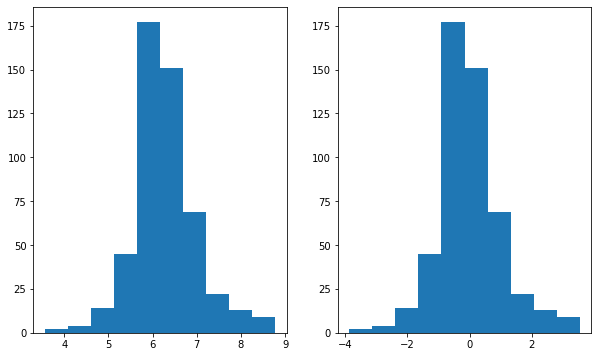

In [36]:
fig, axs = plt.subplots(1, 2,figsize=(10,6))
axs[0]=plt.subplot(1, 2, 1)
axs[0].hist(X['RM'])
axs[1]=plt.subplot(1, 2, 2)
axs[1].hist(standarize(X['RM']))
plt.show()